# Activity 2.1 : Convolutional Neural Network

#### Objective(s):

This activity aims to introduce how to build a convolutional neural network

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network 
* Evaluate the accuracy and loss of the model using convolutional neural network

#### Resources:
* Jupyter Notebook
* CIFAR-10 dataset

#### Procedures
Load the necessary libraries

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# output: []

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

* Shuffle the data
* Split the data into train and test sets

In [3]:

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [4]:

x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


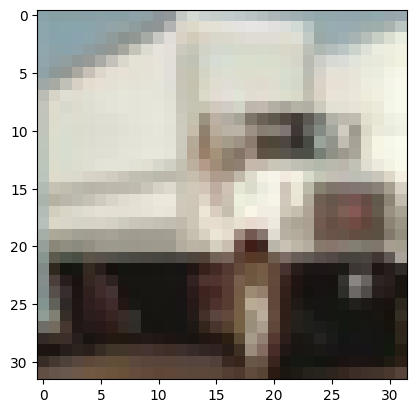

In [5]:
print(y_train[444])
plt.imshow(x_train[444])

In [6]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [7]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [42]:
model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 16, 16, 32)        2432      
                                                                 
 activation_4 (Activation)   (None, 16, 16, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 6, 6, 32)          25632     
                                                                 
 activation_5 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 3, 3, 32)         0         
 g2D)                                                            
                                                                 
 dropout_14 (Dropout)        (None, 3, 3, 32)          0         
                                                      

In [43]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

run_hist1 = model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7483 - accuracy: 0.3610 - val_loss: 1.5064 - val_accuracy: 0.4585
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4659 - accuracy: 0.4686 - val_loss: 1.3333 - val_accuracy: 0.5266
Epoch 3/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3641 - accuracy: 0.5128 - val_loss: 1.2140 - val_accuracy: 0.5686
Epoch 4/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2918 - accuracy: 0.5402 - val_loss: 1.1781 - val_accuracy: 0.5809
Epoch 5/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2468 - accuracy: 0.5568 - val_loss: 1.1684 - val_accuracy: 0.5896
Epoch 6/15
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2106 - accuracy: 0.5714 - val_loss: 1.1471 - val_accuracy: 0.5978
Epoch 7/15
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1858 - accuracy: 0.5808 - val_loss: 1.1090 - val_accuracy:

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

#### Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Commpare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [9]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
STRIDE = (1, 1)

supple_model = Sequential()

# Convolutional Layer
supple_model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same', strides=STRIDE))
supple_model.add(BatchNormalization())
supple_model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, activation='relu', padding='same', strides=STRIDE))
supple_model.add(BatchNormalization())

# Pooling layer
supple_model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout layers
supple_model.add(Dropout(0.25))

supple_model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same', strides=STRIDE))
supple_model.add(BatchNormalization())
supple_model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, activation='relu', padding='same', strides=STRIDE))
supple_model.add(BatchNormalization())
supple_model.add(MaxPooling2D(pool_size=(2, 2)))
supple_model.add(Dropout(0.25))

supple_model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same', strides=STRIDE))
supple_model.add(BatchNormalization())
supple_model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, activation='relu', padding='same', strides=STRIDE))
supple_model.add(BatchNormalization())
supple_model.add(MaxPooling2D(pool_size=(2, 2)))
supple_model.add(Dropout(0.25))

supple_model.add(Flatten())
supple_model.add(Dense(128, activation='relu'))
supple_model.add(Dropout(0.25))
supple_model.add(Dense(10, activation='softmax'))

In [10]:
batch_size = 64

supple_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

run_hist_supple_model = supple_model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

Epoch 1/5
782/782 [==============================] - 25s 18ms/step - loss: 1.5743 - accuracy: 0.4344 - val_loss: 1.3937 - val_accuracy: 0.5119
Epoch 2/5
782/782 [==============================] - 15s 19ms/step - loss: 1.1151 - accuracy: 0.6081 - val_loss: 0.9674 - val_accuracy: 0.6722
Epoch 3/5
782/782 [==============================] - 17s 21ms/step - loss: 0.9130 - accuracy: 0.6845 - val_loss: 0.7838 - val_accuracy: 0.7315
Epoch 4/5
782/782 [==============================] - 14s 17ms/step - loss: 0.7946 - accuracy: 0.7228 - val_loss: 0.7353 - val_accuracy: 0.7477
Epoch 5/5
782/782 [==============================] - 13s 17ms/step - loss: 0.7162 - accuracy: 0.7536 - val_loss: 0.6914 - val_accuracy: 0.7684


## Evaluate model performance

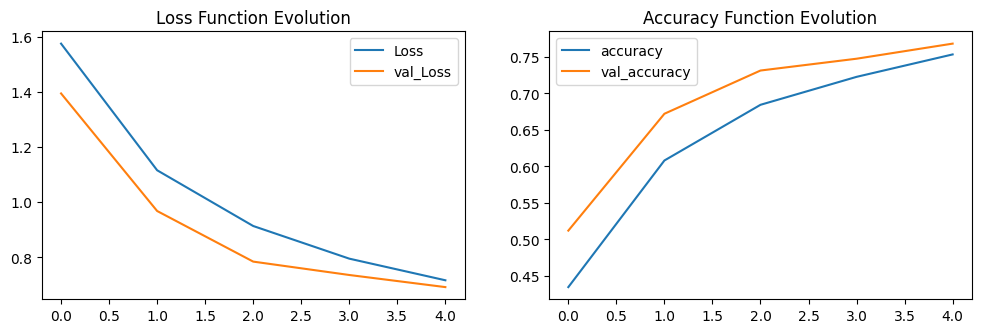

In [11]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(run_hist_supple_model.history['loss'], label='Loss')
plt.plot(run_hist_supple_model.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(run_hist_supple_model.history['accuracy'], label='accuracy')
plt.plot(run_hist_supple_model.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

#### Conclusion

- The accuracy and loss function shows no sign of overfitting between training and validation but since we only used 5 epochs, the model is able to achieve an accuracy of 76%. The graph still show signs of increased performance if we increase the number of epochs, for the reason that there is no signs of plateau within the graph. 

In [49]:
%pip show tensorflow

Name: tensorflowNote: you may need to restart the kernel to use updated packages.

Version: 2.10.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\spenc\anaconda3\envs\gpuenv\lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, keras-preprocessing, libclang, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
